In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
#import data and take a look

df = pd.read_csv ('adult_csv.csv', na_values=['#NAME?'])

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
# Take a look at the outcome variable: 'income' known as 'class'
print(df['class'].value_counts())

<=50K    37155
>50K     11687
Name: class, dtype: int64


In [6]:
#Assign outcome as 0 if class <=50K and as 1 if class >50K

df['class'] = [0 if x == '<=50K' else 1 for x in df['class']]

#Assign X as a DataFrame of features and y as a Series of the outcome variable
X = df.drop('class', 1)
y = df['class'] 

/tmp/ipykernel_700788/642667963.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('class', 1)


In [7]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

## Basic data cleaning

In [9]:
# Education is a categorical feature:

print(X['education'].head())

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
Name: education, dtype: object


In [10]:
# Use get_dummies in pandas
# Another option: OneHotEncoder in sci-kit learn

print(pd.get_dummies(X['education']).head())

   10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  Assoc-voc  \
0     0     0     0        0        0        0    0           0          0   
1     0     0     0        0        0        0    0           0          0   
2     0     0     0        0        0        0    0           0          0   
3     0     1     0        0        0        0    0           0          0   
4     0     0     0        0        0        0    0           0          0   

   Bachelors  Doctorate  HS-grad  Masters  Preschool  Prof-school  \
0          1          0        0        0          0            0   
1          1          0        0        0          0            0   
2          0          0        1        0          0            0   
3          0          0        0        0          0            0   
4          1          0        0        0          0            0   

   Some-college  
0             0  
1             0  
2             0  
3             0  
4             0  


In [11]:
# Decide which categorical variables you want to use in model

for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'workclass' has 9 unique categories
Feature 'education' has 16 unique categories
Feature 'marital-status' has 7 unique categories
Feature 'occupation' has 15 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 5 unique categories
Feature 'sex' has 2 unique categories
Feature 'native-country' has 42 unique categories


In [12]:
# Although, 'native_country' has a lot of unique categories, most categories only have a few observations

print(X['native-country'].value_counts().sort_values(ascending=False).head(10))

United-States    43832
Mexico             951
Philippines        295
Germany            206
Puerto-Rico        184
Canada             182
El-Salvador        155
India              151
Cuba               138
England            127
Name: native-country, dtype: int64


In [13]:
# In this case, bucket low frequency categories as "Other"

X['native-country'] = ['United-States' if x == 'United-States' else 'Other' for x in X['native-country']]

print(X['native-country'].value_counts().sort_values(ascending=False))

United-States    43832
Other             5010
Name: native-country, dtype: int64


In [14]:
# Create a list of features to dummy

todummy_list = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [15]:
# Fuction to dummy all the categorical variables used for modeling

def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [16]:
X = dummy_df(X, todummy_list)
X.head()

/tmp/ipykernel_700788/3620565919.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(x, 1)


,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Other,native-country_United-States
0,2,77516,13,1,0,2,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,3,83311,13,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,2,215646,9,0,0,2,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,3,234721,7,0,0,2,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
4,1,338409,13,0,0,2,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0


## Handling missing data

In [17]:
# How much of your data is missing?

X.isnull().sum().sort_values(ascending=False).head()

age                         0
occupation_Tech-support     0
marital-status_Separated    0
marital-status_Widowed      0
occupation_Adm-clerical     0
dtype: int64

In [18]:
# If you have missing values. Impute missing values using Impute in sklearn.preprocessing
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.NaN, strategy='median')
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X), columns=X.columns)

In [19]:
# Now check againg to see if you have missing data

X.isnull().sum().sort_values(ascending=False).head()

age                         0
occupation_Tech-support     0
marital-status_Separated    0
marital-status_Widowed      0
occupation_Adm-clerical     0
dtype: int64

## More Data Exploration
###  Outlier detection

In [20]:
#How to import an image and show

#from PIL import Image
#myImage = Image.open('IQR.png')
#myImage.show()

In [21]:
 #find outliers using tukey IQR rules
    
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) |(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [22]:
tukey_indices, tukey_values = find_outliers_tukey(X['age'])
print(np.sort(tukey_values))

[]


### Outlier detection - Kernel Density Estimation

In [23]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw="scott", fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_ind, outlier_value

In [ ]:
kde_indices, kde_values = find_outliers_kde(X['age'])
print(np.sort(kde_values))

## Distribution of Features

In [24]:
# Use pyplot in matplotlib to plot histograms

def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

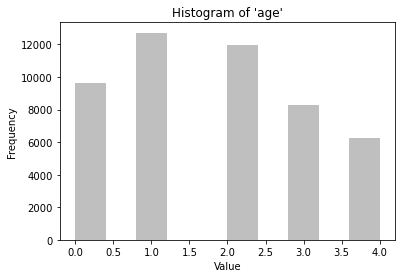

In [25]:
plot_histogram(X['age'])

In [26]:
# Plot histograms to show distribution of features by DV categories

def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='DV=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='DV=1')
    plt.title("Histogram of '{var_name}' by DV Category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

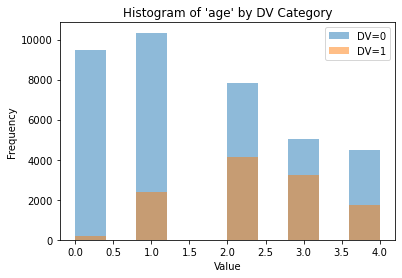

In [27]:
plot_histogram_dv(X['age'], y)

## Feature Engineering

In [28]:
# Use PloynomialFeatures in sklearn.preprocessing to create two-way interactions for all features
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    #Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    #Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values
    noint_indices = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indices], axis=1)
    
    return df

In [29]:
X = add_interactions(X)
X.head()

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,race_Other_native-country_Other,race_Other_native-country_United-States,race_White_sex_Female,race_White_sex_Male,race_White_native-country_Other,race_White_native-country_United-States,sex_Female_native-country_Other,sex_Female_native-country_United-States,sex_Male_native-country_Other,sex_Male_native-country_United-States
0,2.0,77516.0,13.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,83311.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.0,215646.0,9.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3.0,234721.0,7.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,338409.0,13.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Dimesionality reduction using PCA

In [30]:
# Use PCA from sklearn.decomposition to find principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X))

In [31]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-9.547508e+05,-84908.496010,68891.243150,-56662.367337,75333.538530,-45112.935014,-106234.492374,-23568.462563,16873.155787,-15295.512809
1,-8.931681e+05,2237.149876,194280.017536,-182441.470475,-68580.383938,-28944.392452,-32703.379600,-33597.010173,13778.090085,-24327.929725
2,7.358884e+04,102061.594633,-34470.505232,177825.935476,-12377.049143,116307.632285,-123675.000663,-1287.383031,75744.734256,-139662.879483
3,-1.711525e+05,472537.674738,-81140.830874,-2655.195449,-93131.550064,58988.534750,19964.206326,-71240.328945,89831.583864,237250.740080
4,2.481200e+06,-342701.977479,162640.506294,-73185.154208,17541.350482,-427029.964061,280590.605288,-126215.125061,163671.387319,31819.637475


## Feature Selection and model building

In [33]:
# Use train_test_split in sklearn.cross_validation to split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)

In [34]:
# The total number of features have grown substantially after dummying and adding interaction terms

print(df.shape)
print(X.shape)

(48842, 15)
(48842, 1799)


In [35]:
# Such a large set of features can cause overfitting and also slow computing
# Use feature selection to select the most important features

import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

/home/mohammad/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 265  290  454  544  547  761  770  783  901  934  936 1022 1129 1140
 1241 1256 1266 1273 1277 1283 1366 1376 1381 1534] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/mohammad/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [36]:
colnames_selected

['capitalgain',
 'marital-status_Married-civ-spouse',
 'relationship_Husband',
 'age_education-num',
 'age_marital-status_Married-civ-spouse',
 'age_relationship_Husband',
 'fnlwgt_marital-status_Married-civ-spouse',
 'education-num_capitalgain',
 'education-num_hoursperweek',
 'education-num_marital-status_Married-civ-spouse',
 'education-num_relationship_Husband',
 'hoursperweek_marital-status_Married-civ-spouse',
 'hoursperweek_relationship_Husband',
 'marital-status_Married-civ-spouse_relationship_Husband',
 'marital-status_Married-civ-spouse_race_White',
 'marital-status_Married-civ-spouse_sex_Male',
 'marital-status_Married-civ-spouse_native-country_United-States',
 'relationship_Husband_race_White',
 'relationship_Husband_sex_Male',
 'relationship_Husband_native-country_United-States']

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    return auc

In [38]:
auc_processed = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print(auc_processed)

0.6533638856821805


## Build model using unprocessed data

In [39]:
# Drop missing values so model does not throw any error

df_unprocessed = df
df_unprocessed = df_unprocessed.dropna(axis=0, how='any')
print(df.shape)
print(df_unprocessed.shape)

(48842, 15)
(45222, 15)


In [40]:
# Remove no-numeric columns so model does not throw an error

for col_name in df_unprocessed.columns:
    if df_unprocessed[col_name].dtypes not in ['int32', 'int64', 'float32', 'float64']:
        df_unprocessed = df_unprocessed.drop(col_name, 1)

/tmp/ipykernel_700788/1629137789.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_unprocessed = df_unprocessed.drop(col_name, 1)


In [42]:
# Split into features and outcomes

X_unprocessed = df_unprocessed.drop('class', 1)
y_unprocessed = df_unprocessed['class']

/tmp/ipykernel_700788/2459633510.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_unprocessed = df_unprocessed.drop('class', 1)


In [43]:
# Take a look again at what the unprocessed feature set looks like
print(X_unprocessed.head())

   age  fnlwgt  education-num  capitalgain  capitalloss  hoursperweek
0    2   77516             13            1            0             2
1    3   83311             13            0            0             0
2    2  215646              9            0            0             2
3    3  234721              7            0            0             2
4    1  338409             13            0            0             2


In [45]:
# Split unprocessed data into train and test set
# Build model and assess performance

X_train_unprocessed, X_test_unprocessed, y_train, y_test = train_test_split(
    X_unprocessed, y_unprocessed, train_size=0.70, random_state=1)

auc_unprocessed = find_model_perf(X_train_unprocessed, y_train, X_test_unprocessed, y_test)
print(auc_unprocessed)

0.5060354284773552


In [46]:
# Compare model performance
print('AUC of model with data preprocessing: {auc}'.format(auc=auc_processed))
print('AUC of model with data without preprocessing: {auc}'.format(auc=auc_unprocessed))
per_improve = ((auc_processed-auc_unprocessed)/auc_unprocessed)*100
print('Model improvement of preprocessing: {per_improve}%'.format(per_improve = per_improve))

AUC of model with data preprocessing: 0.6533638856821805
AUC of model with data without preprocessing: 0.5060354284773552
Model improvement of preprocessing: 29.11425740449282%
